<a href="https://colab.research.google.com/github/yeseul77/Python/blob/main/0122%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/dataset/.kaggle"  # 올바른 경로를 사용해주세요


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
#로지스틱 회귀 모델과 인공 신경망 이용해서 분류문제를 해결

from tensorflow import keras
(train_input, train_target), (test_input,test_target)=keras.datasets.fashion_mnist.load_data()

In [207]:
train_input.shape

(60000, 28, 28)

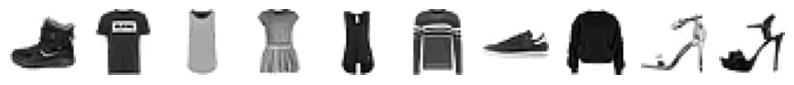

In [208]:
fig, axs=plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i],cmap='gray_r')
  axs[i].axis('off')
plt.show()


In [ ]:
# 0 티셔츠
# 1 바지
# 2 스웨터
# 3 드레스
# 4 코드
# 5 샌달
#6  셔츠
#7 스니커츠
# 8 가방
# 9 앵글 부츠

In [209]:
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
np.unique(train_target,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [210]:
train_scaled = train_input /255.0 # 0~1사이 값으로 변환
train_scaled = train_scaled.reshape(-1,28*28) # 벡터로 변

In [211]:
train_scaled.reshape

<function ndarray.reshape>

In [212]:
train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [213]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target=train_test_split(train_scaled, train_target, random_state=42)

In [214]:
train_scaled.shape

(45000, 784)

In [215]:
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784, ))

In [216]:
model=keras.Sequential(dense)

In [220]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [221]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 [==============================] - 4s 2ms/step - loss: 0.6106 - accuracy: 0.7918
Epoch 2/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4797 - accuracy: 0.8378
Epoch 3/5
1407/1407 [==============================] - 2s 2ms/step - loss: 0.4538 - accuracy: 0.8464
Epoch 4/5
1407/1407 [==============================] - 2s 2ms/step - loss: 0.4398 - accuracy: 0.8520
Epoch 5/5
1407/1407 [==============================] - 2s 2ms/step - loss: 0.4305 - accuracy: 0.8550


In [222]:
model.evaluate(val_scaled,val_target)# 테스트

469/469 [==============================] - 1s 2ms/step - loss: 0.4684 - accuracy: 0.8377


[0.4684053063392639, 0.8377333283424377]

In [ ]:
from tensorflow import keras

# Sequential 모델 정의
model = keras.Sequential([
    keras.layers.Dense(10, activation='softmax', input_shape=(784,))
])

In [ ]:
from tensorflow import keras

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

model = keras.Sequential([dense])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [223]:
npy_data = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/x_gray.npy')
y_data = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/y.npy')

In [224]:
dogcat_2d =npy_data.reshape(-1,64*64)/255

In [225]:
dogcat_2d.shape

(1000, 4096)

In [226]:
dogcat_2d[0]

array([0.96470588, 0.98823529, 0.97647059, ..., 0.48627451, 0.4745098 ,
       0.44705882])

In [227]:
from sklearn.model_selection import train_test_split
# 원데이터로 부터
train_val_input, test_input, train_val_target, test_target = train_test_split(dogcat_2d, y_data, random_state=42)


In [229]:
train_input,val_input,train_target,val_target =train_test_split(train_val_input,train_val_target,random_state=42)
# 트레인 데이터로 부터

In [ ]:
from tensorflow import keras

dense = keras.layers.Dense(10, activation='softmax', input_shape=(4096,))  # input_shape에 들어갈 값?

model = keras.Sequential([dense])
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')  # 손실 함수와 메트릭스를 리스트로 감싸야 합니다.
model.fit(train_input, train_target, epochs=5)

Epoch 1/5
18/18 [==============================] - 0s 3ms/step - loss: 1.4329 - accuracy: 0.4786
Epoch 2/5
18/18 [==============================] - 0s 3ms/step - loss: 1.0876 - accuracy: 0.5089
Epoch 3/5
18/18 [==============================] - 0s 5ms/step - loss: 1.1007 - accuracy: 0.5107
Epoch 4/5
18/18 [==============================] - 0s 3ms/step - loss: 1.1348 - accuracy: 0.4947
Epoch 5/5
18/18 [==============================] - 0s 2ms/step - loss: 1.1205 - accuracy: 0.4680


In [ ]:
model.evaluate(val_input,val_target)

6/6 [==============================] - 0s 3ms/step - loss: 1.0347 - accuracy: 0.4734


[1.0347434282302856, 0.47340425848960876]

In [ ]:
model.evaluate(test_input,test_target)

8/8 [==============================] - 0s 3ms/step - loss: 0.9960 - accuracy: 0.4960


[0.9959803223609924, 0.4959999918937683]

In [ ]:
#심층 신경망 분류 문제 해결
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28, 28)  # 28*28 형태로
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')
model = keras.Sequential([dense1, dense2])

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 100)               78500     
                                                                 
 dense_51 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='mnist_model')


In [ ]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 100)               78500     
                                                                 
 dense_53 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')


# 모델 훈련
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1003
Epoch 2/5
1407/1407 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1003
Epoch 3/5
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1003
Epoch 4/5
1407/1407 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.1003
Epoch 5/5
1407/1407 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1003


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# Fashion MNIST 데이터셋 로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 데이터 정규화
train_scaled = train_input / 255.0

In [ ]:
train_scaled, val_scaled,train_target,val_target =train_test_split(train_scaled,train_target,random_state=42)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5446 - accuracy: 0.8098
Epoch 2/5
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3991 - accuracy: 0.8564
Epoch 3/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3589 - accuracy: 0.8697
Epoch 4/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3349 - accuracy: 0.8796
Epoch 5/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3174 - accuracy: 0.8852


In [ ]:
model.evaluate(val_scaled,val_target)

469/469 [==============================] - 1s 3ms/step - loss: 0.4273 - accuracy: 0.8553


[0.4272909462451935, 0.8553333282470703]

In [240]:
#옵티마이저
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(trian_scale, train_target,epochs=5)

Epoch 1/5
1407/1407 [==============================] - 4s 2ms/step - loss: 0.5318 - accuracy: 0.8155
Epoch 2/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3992 - accuracy: 0.8559
Epoch 3/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3579 - accuracy: 0.8694
Epoch 4/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3325 - accuracy: 0.8783
Epoch 5/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3108 - accuracy: 0.8856


In [241]:
model.evaluate(val_scaled,val_target)

469/469 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.8762


[0.3394407331943512, 0.8762000203132629]

In [242]:
# 하이퍼 파라미터 (콜백..에폭..등 사용)
(train_input, train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

In [243]:
trian_scaled=train_input/255
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,random_state=42)

In [244]:
def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [245]:
model=model_fn()
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 784)               0         
                                                                 
 dense_79 (Dense)            (None, 100)               78500     
                                                                 
 dense_80 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [246]:
dense1=keras.layers.Dense(100,activation='sigmoid', input_shape=(784, ))
dense2=keras.layers.Dense(10,activation='softmax')
model=keras.Sequential([dense1,dense2])

In [247]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 100)               78500     
                                                                 
 dense_82 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [248]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
history=model.fit(train_scaled, train_target, epochs=5, verbose=0)

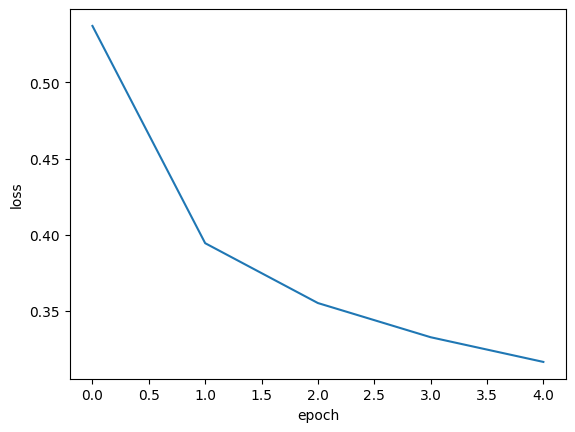

In [251]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

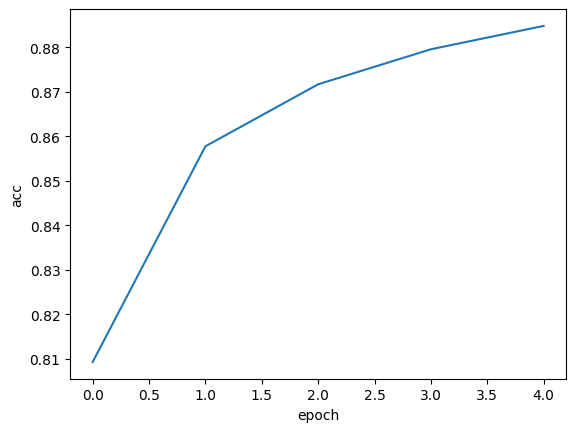

In [252]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [ ]:
# from tensorflow.keras.utils import plot_model

# dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
# dense2 = keras.layers.Dense(10, activation='softmax')
# model = keras.Sequential([dense1, dense2])

# # 모델을 그림으로 출력
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [253]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0)

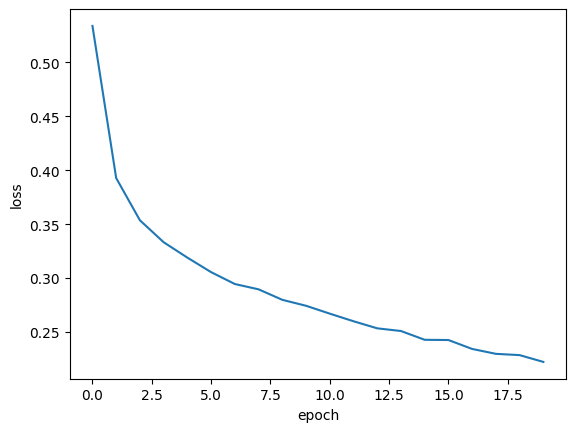

In [254]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [255]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target))

In [256]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

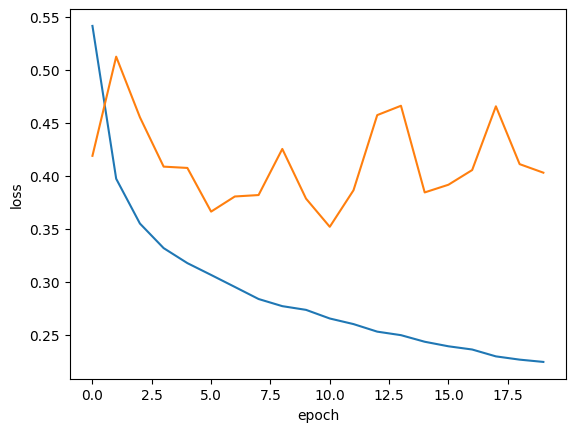

In [257]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [258]:
model.save_weights('model-weight.h5')

In [259]:
model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [260]:
!ls

drive  model_plot.png  model-weight.h5	model-weights.h5  model-whole.h5  sample_data


In [261]:
model=model_fn(keras.layers.Dropout(0,3))

In [262]:
model.load_weights('model-weight.h5')

In [263]:
model=keras.models.load_model('model-whole.h5')

In [264]:
model.evaluate(val_scaled,val_target)

469/469 [==============================] - 1s 2ms/step - loss: 0.4030 - accuracy: 0.8874


[0.40297096967697144, 0.8873999714851379]